In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os

In [2]:
df_train = pd.read_csv("C:/Users/palit/Downloads/training_data.csv")
df_train

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Summit,105,0,day_81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435
3137,Fayette,0,0,day_55,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
3138,Clark,147,0,day_106,929,0.000013,0.000105,0.001076,0.000009,0.000012,...,60.6,7.7,736,43625,25300,92.7,48.1,16.6,107300,0.865754
3139,Logan,0,0,day_1,144,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.5,5.8,766,49783,28346,90.7,55.2,13.7,127200,0.949363


<AxesSubplot:>

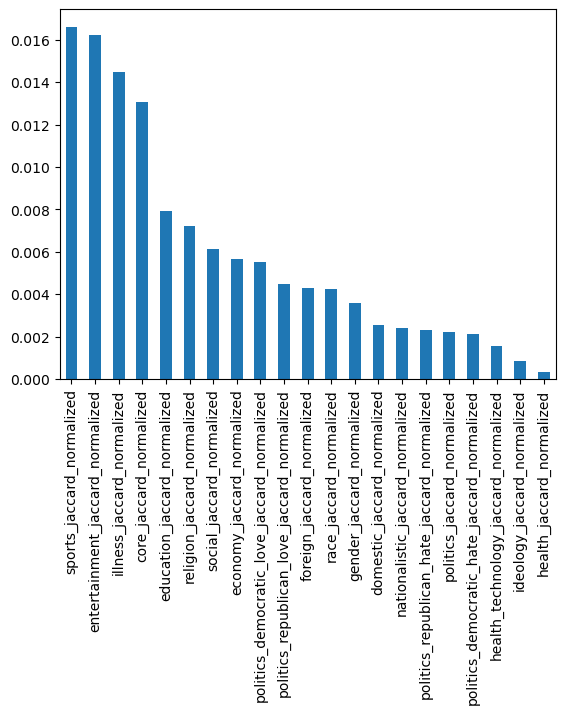

In [3]:
# select columns with 'jaccard_normalized' in their names
jaccard_cols = [col for col in df_train.columns if 'jaccard_normalized' in col]

# calculate the mean of the selected columns
mean_jaccard = df_train[jaccard_cols].mean()

# create bar chart sorted in descending order
mean_jaccard.sort_values(ascending=False).plot(kind='bar')


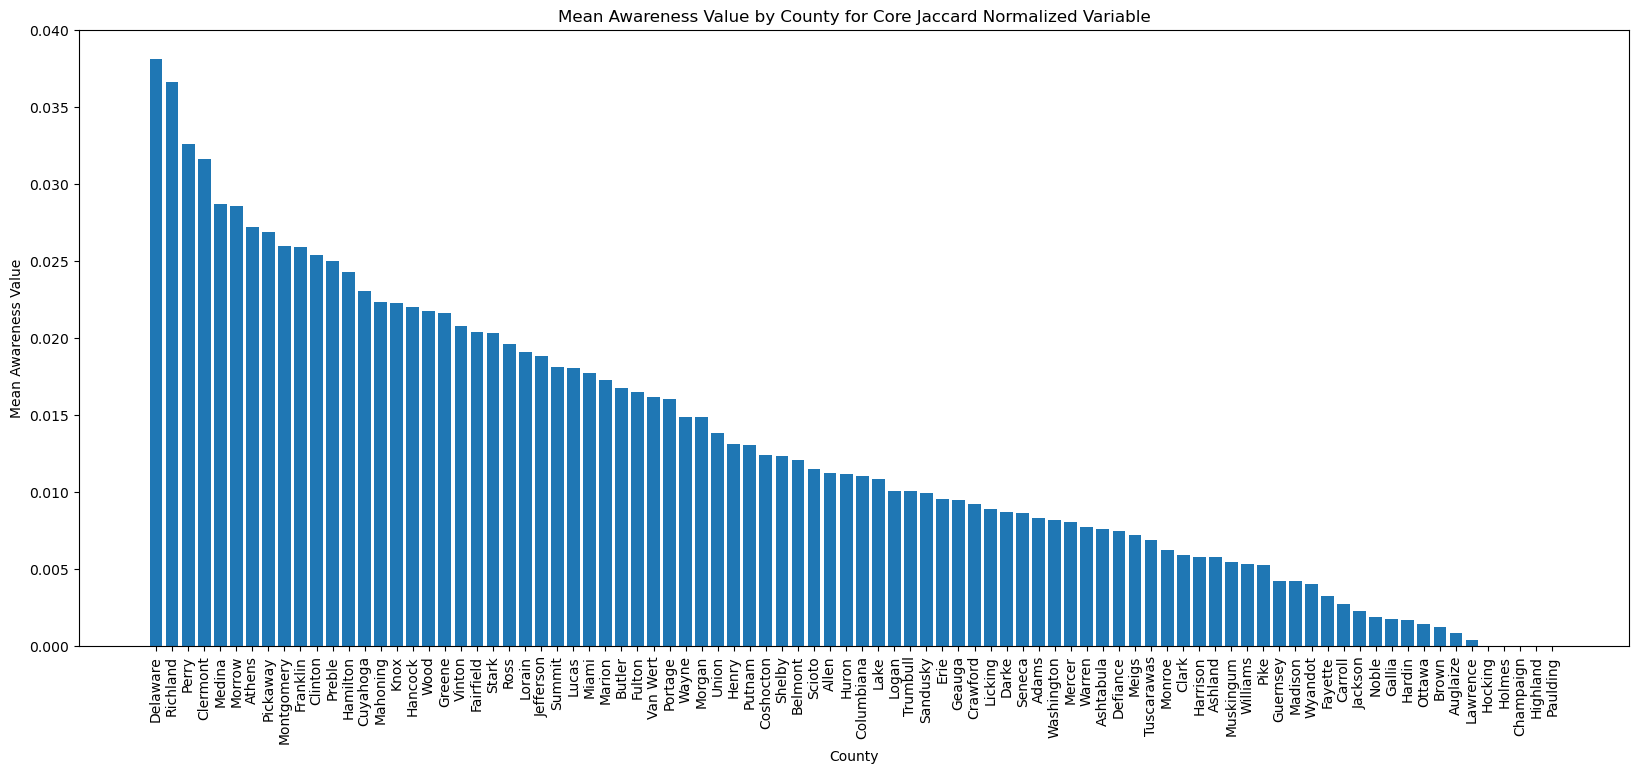

In [4]:
# calculate mean awareness value for each county
mean_awareness = df_train.groupby('county')['core_jaccard_normalized'].mean().sort_values(ascending=False)

# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(mean_awareness.index, mean_awareness)
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Mean Awareness Value')
plt.title('Mean Awareness Value by County for Core Jaccard Normalized Variable')
plt.show()


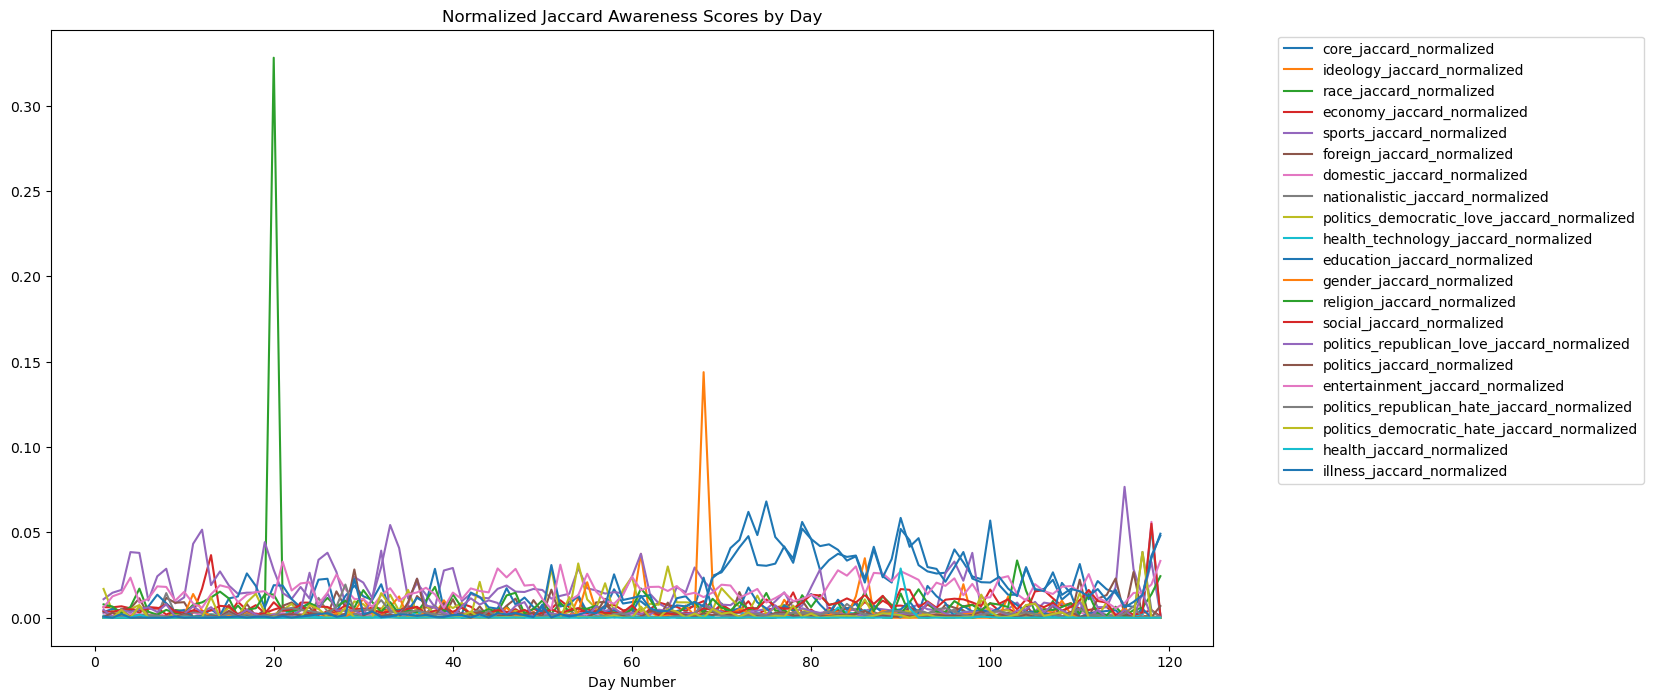

In [5]:
df_train['date_index_converted'] = df_train['date_index_converted'].str[4:].astype(int)
# calculate average normalized Jaccard scores for each day
jaccard_cols = [col for col in df_train.columns if 'jaccard_normalized' in col]
jaccard_averages = df_train.groupby('date_index_converted')[jaccard_cols].mean()

# create line chart with overlapping lines for each topic
jaccard_averages.plot(figsize=(15, 8), title='Normalized Jaccard Awareness Scores by Day', xlabel = 'Day Number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


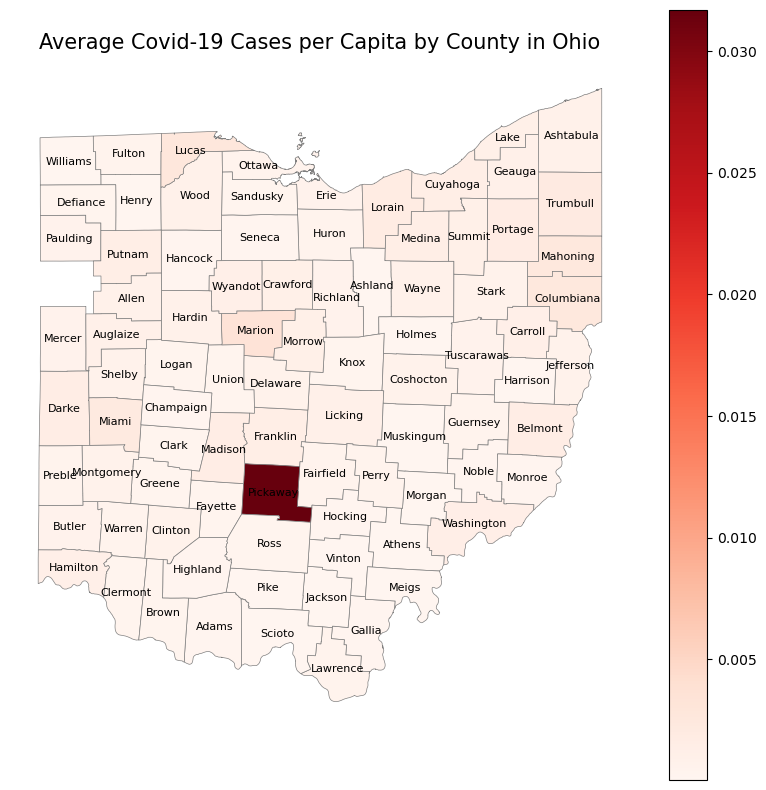

In [14]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Load the shapefile
shapefile = gpd.read_file("C:/Users/palit/Downloads/tims_shp_datasets_20230409-1951/County.shp")
ohio_counties = shapefile.rename(columns = {'COUNTY':'county'})
ohio_counties['county'] = ohio_counties['county'].str.capitalize()

# Calculate the number of cases and deaths per capita
df_train['cases_per_capita'] = df_train['cases'] / df_train['total_pop']
df_train['deaths_per_capita'] = df_train['deaths'] / df_train['total_pop']

avg_covid_data = df_train.groupby("county")[["cases_per_capita", "deaths_per_capita"]].mean().reset_index()

# Merge the Covid-19 data with the shapefile based on the county name
merged_data = ohio_counties.merge(avg_covid_data, on='county')

# Plot the map for cases per capita
fig1, ax1 = plt.subplots(figsize=(10, 10))
merged_data.plot(column='cases_per_capita', cmap='Reds', linewidth=0.5, edgecolor='gray', ax=ax1, legend = True)
ax1.axis('off')
ax1.set_title('Average Covid-19 Cases per Capita by County in Ohio', fontdict={'fontsize': '15', 'fontweight' : '3'})
for idx, row in merged_data.iterrows():
    ax1.text(row.geometry.centroid.x, row.geometry.centroid.y, row['county'], ha='center', va='center', fontsize=8)
plt.show()

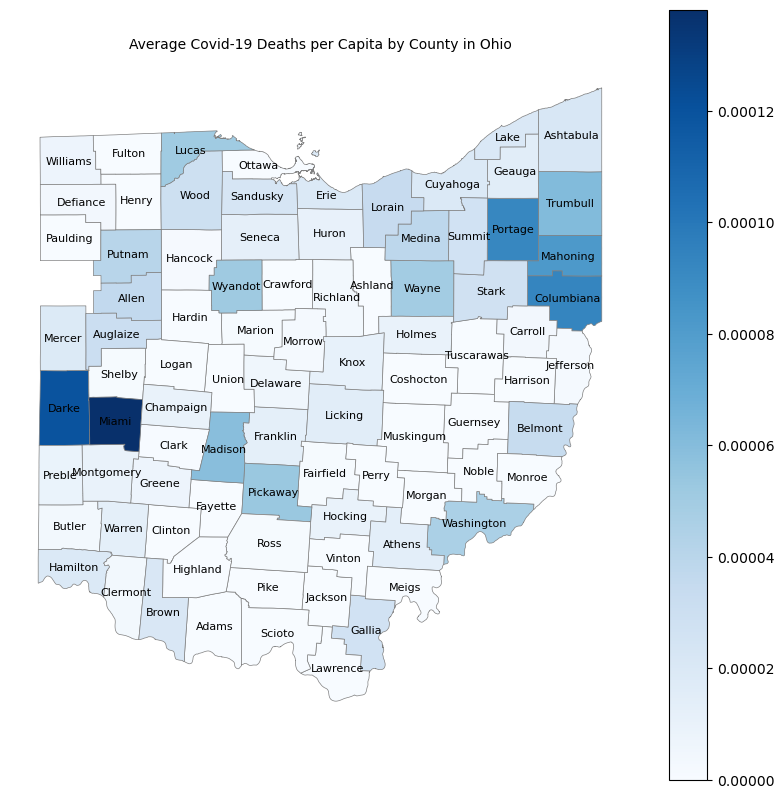

In [15]:
# Plot the map for deaths per capita
fig2, ax2 = plt.subplots(figsize=(10, 10))
merged_data.plot(column='deaths_per_capita', cmap='Blues', linewidth=0.5, edgecolor='gray', ax=ax2, legend = True)
ax2.axis('off')
ax2.set_title('Average Covid-19 Deaths per Capita by County in Ohio', fontdict={'fontsize': '10', 'fontweight' : '3'})
for idx, row in merged_data.iterrows():
    ax2.text(row.geometry.centroid.x, row.geometry.centroid.y, row['county'], ha='center', va='center', fontsize=8)
plt.show()

### Interpretations in pdf attached